In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('diamonds.csv')
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [3]:
data=data.drop(columns=['Unnamed: 0'])

In [4]:
data.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data['volume']=data['x']*data['y']*data['z']
data=data.drop(columns=['x','y','z'])
data = data[data['volume']<1000]
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'volume'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Diamond Carat Weight')

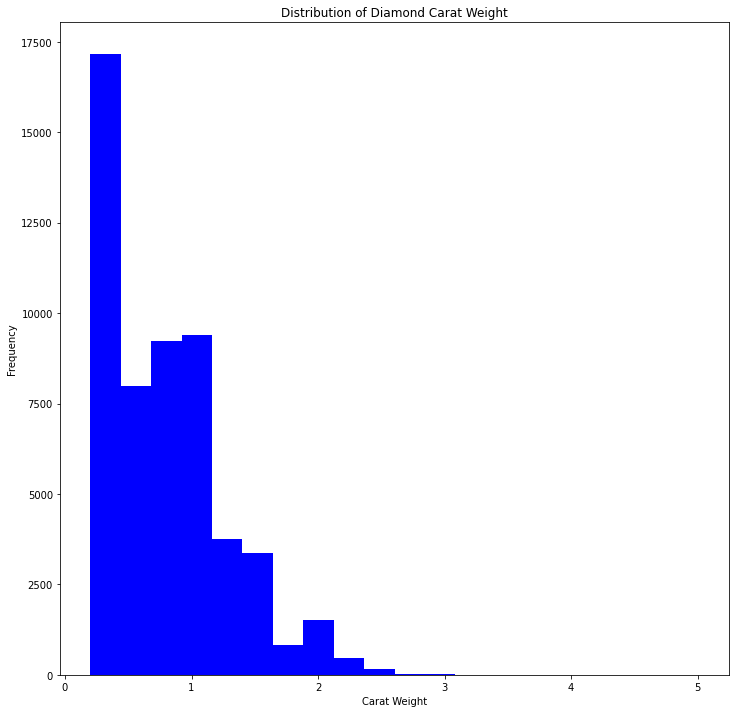

In [7]:
plt.figure(figsize=[12,12])
plt.hist(data['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

Text(0.5, 1.0, 'Distribution of diamond depth')

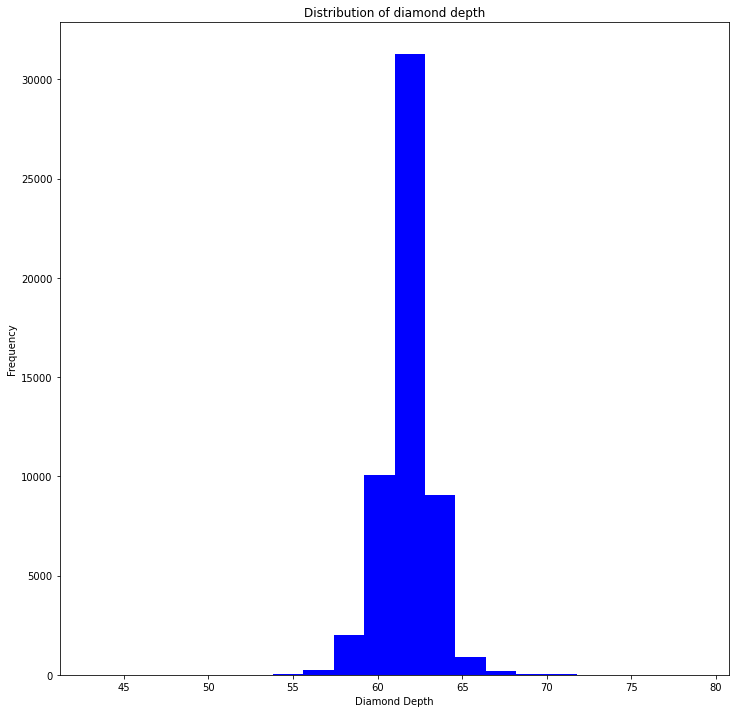

In [8]:
plt.figure(figsize=[12,12])
plt.hist(data['depth'],bins=20,color='b')
plt.xlabel('Diamond Depth')
plt.ylabel('Frequency')
plt.title('Distribution of diamond depth')

Text(0.5, 1.0, 'Distribution of Diamond Price in USD')

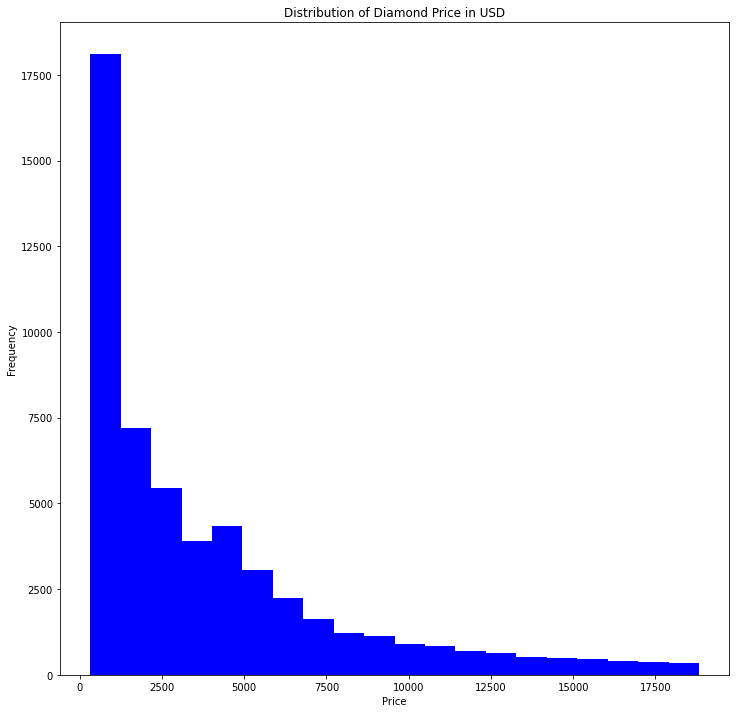

In [9]:
plt.figure(figsize=[12,12])
plt.hist(data['price'],bins=20,color='b')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price in USD')

Text(0.5, 1.0, 'Distribution of Diamond Volume')

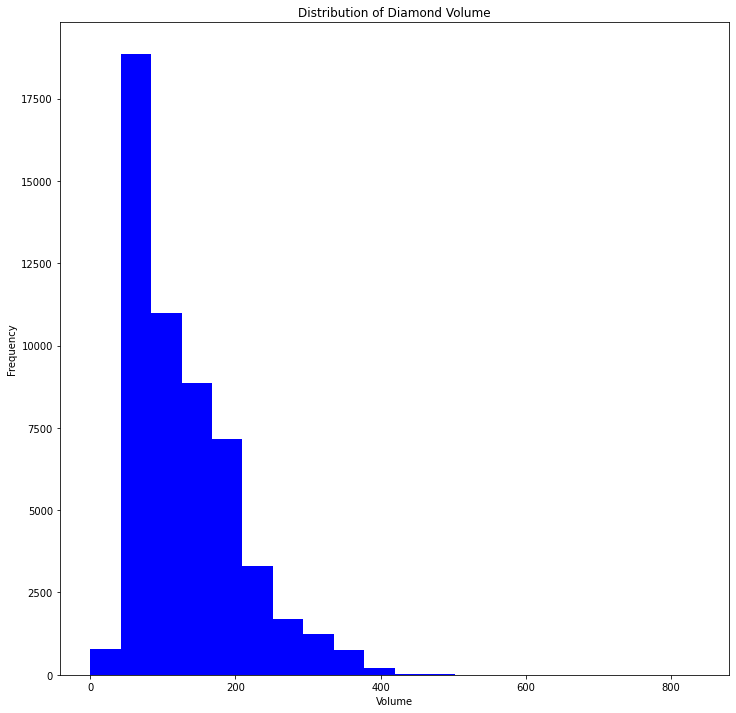

In [10]:
plt.figure(figsize=[12,12])
plt.hist(data['volume'],bins=20,color='b')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

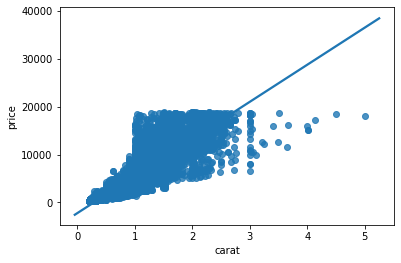

In [14]:
sns.regplot(x = 'carat', y = 'price', data=data)

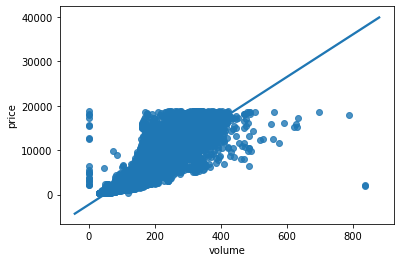

In [15]:
sns.regplot(x = 'volume', y = 'price', data=data)

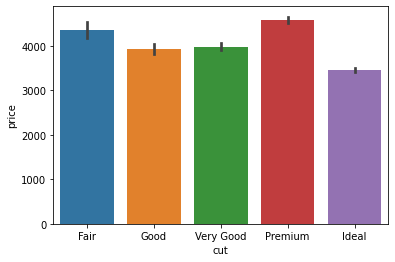

In [16]:
sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=data)

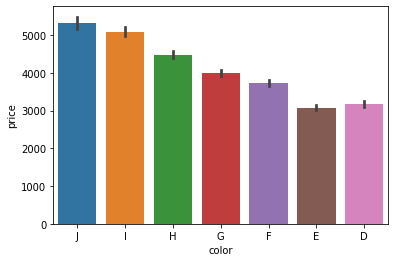

In [17]:
sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=data)

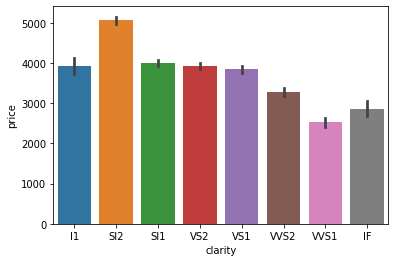

In [18]:
sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=data)

In [21]:
data['cut'] = data['cut'].apply(lambda x: 1 if x=='Fair' 
                                        else(2 if x=='Good' 
                                        else(3 if x=='Very Good' 
                                        else(4 if x=='Premium' 
                                        else 5))))

In [22]:
data['color'] = data['color'].apply(lambda x: 1 if x=='J' 
                                          else(2 if x=='I'
                                          else(3 if x=='H'
                                          else(4 if x=='G'
                                          else(5 if x=='F'
                                          else(6 if x=='E' 
                                          else 7))))))

In [23]:
data['clarity'] = data['clarity'].apply(lambda x: 1 if x=='I1' 
                                          else(2 if x=='SI2'
                                          else(3 if x=='SI1'
                                          else(4 if x=='VS2'
                                          else(5 if x=='VS1'
                                          else(6 if x=='WS2'
                                          else 7 if x=='WS1' 
                                          else 8))))))


In [24]:
scaler = MinMaxScaler()
data[['cut','color','clarity']] = scaler.fit_transform(data[['cut','color','clarity']])


In [25]:
data['diamond score'] = data['cut'] + data['color'] + data['clarity']

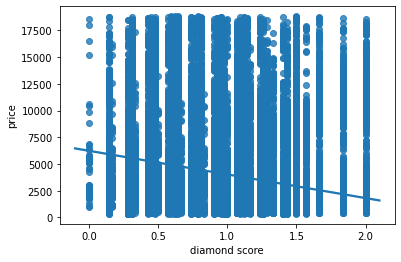

In [26]:
sns.regplot(x = 'diamond score', y = 'price', data=data)

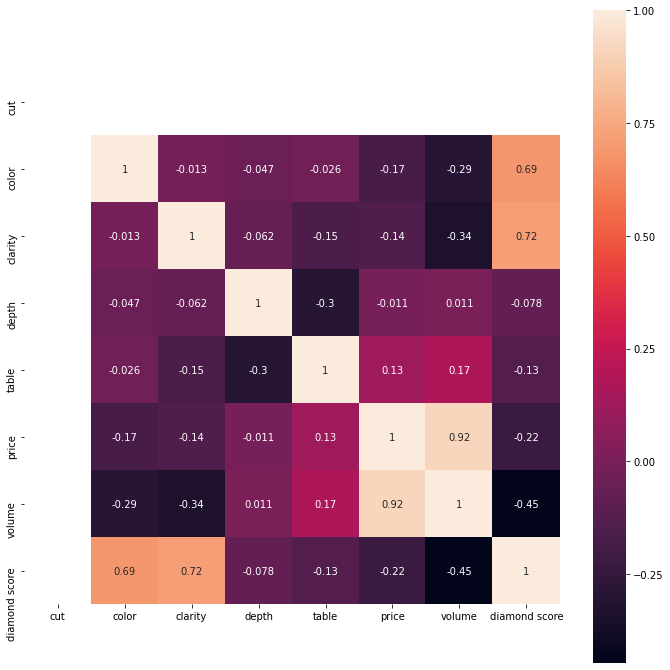

In [27]:
plt.figure(figsize=(12, 12))
correlation = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
sns.heatmap(correlation, vmax=1, annot=True,square=True)

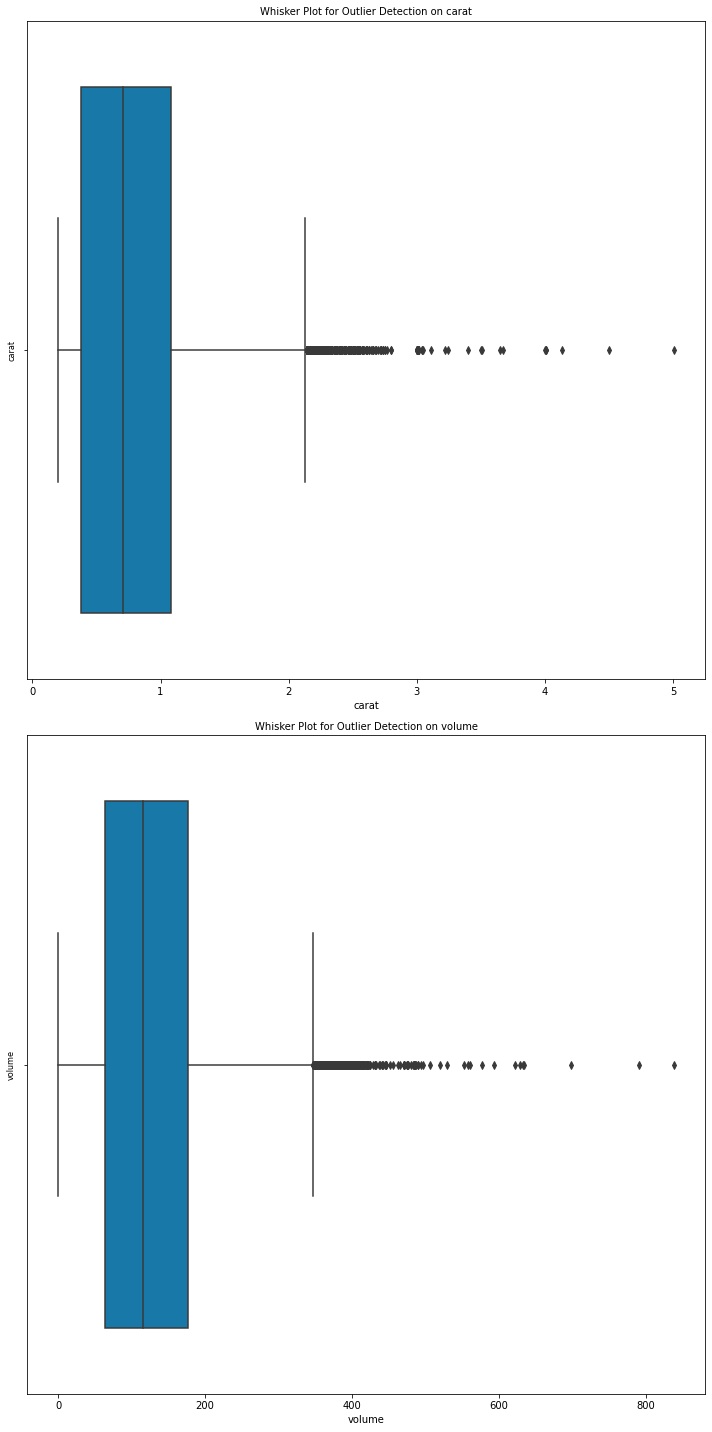

In [45]:
Column_List = ['carat','volume']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [46]:
Desp_Statistics=data.describe()
Desp_Statistics=Desp_Statistics.T

In [47]:
Desp_Statistics['IQR']=Desp_Statistics['75%']-Desp_Statistics['25%']

In [49]:
from scipy import stats
data = data[(np.abs(stats.zscore(data[['carat','volume']])) < 3).all(axis = 1)] 

In [50]:
test_data = data.iloc[-round(len(data)*.1):].copy()
data.drop(data.index[-round(len(data)*.1):],inplace=True)
test_data.drop('price',1,inplace=True)
print(data.shape)
print(test_data.shape)

(43397, 9)
(4822, 8)


In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

In [52]:
X = data.drop(['price'],1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [53]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Linear regression accuracy: ', (linear_regression.score(X_test,y_test))*100)

Linear regression accuracy:  90.28609753473224


Text(0.5, 1.0, 'Linear Regression Model')

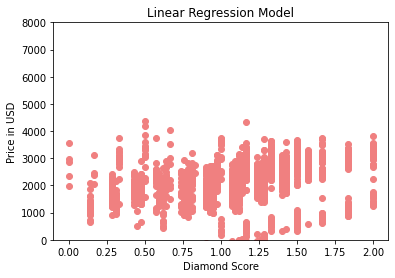

In [54]:
plt.scatter(test_data['diamond score'],linear_regression.predict(test_data),color='lightcoral')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Linear Regression Model')

In [55]:
ridge = Ridge(normalize=True)
ridge.fit(X_train,y_train)
print('Ridge regression accuracy: ',(ridge.score(X_test,y_test))*100)

Ridge regression accuracy:  76.47532797488093


Text(0.5, 1.0, 'Ridge Regression Model')

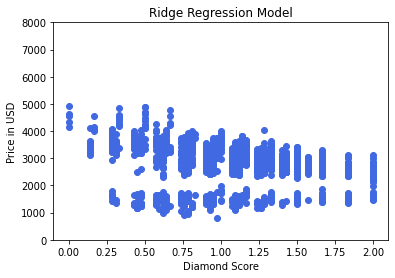

In [56]:
plt.scatter(test_data['diamond score'],ridge.predict(test_data),color='royalblue')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Ridge Regression Model')

In [57]:
lasso = Lasso(normalize=True)
lasso.fit(X_train,y_train)
print('Lasso regression accuracy: ',(ridge.score(X_test,y_test))*100)

Lasso regression accuracy:  76.47532797488093


Text(0.5, 1.0, 'Lasso Regression Model')

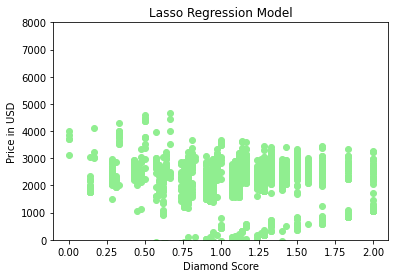

In [58]:
plt.scatter(test_data['diamond score'],lasso.predict(test_data),color='lightgreen')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Lasso Regression Model')

In [59]:
elastic_net = ElasticNet()
elastic_net.fit(X_train,y_train)
print('Elastic net accuracy: ',(elastic_net.score(X_test,y_test))*100)

Elastic net accuracy:  87.09094133816416


Text(0.5, 1.0, 'Elastic Net Model')

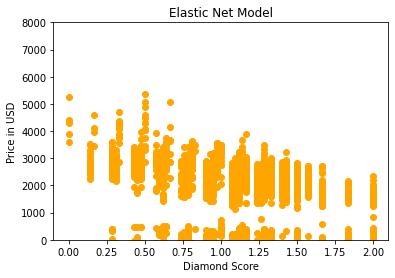

In [60]:
plt.scatter(test_data['diamond score'],elastic_net.predict(test_data),color='orange')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Elastic Net Model')

In [61]:
corr_matrix=data.corr()

In [73]:
corr_matrix.drop(columns=['cut'])
corr_matrix.drop(['cut'])

,carat,cut,color,clarity,depth,table,price,volume,diamond score
carat,1.000000,NaN,-0.290520,-0.351170,0.020630,0.194178,0.921671,0.997033,-0.453918
color,-0.290520,NaN,1.000000,0.002927,-0.042133,-0.022100,-0.165191,-0.289711,0.692393
clarity,-0.351170,NaN,0.002927,1.000000,-0.061309,-0.157802,-0.145033,-0.346871,0.723544
depth,0.020630,NaN,-0.042133,-0.061309,1.000000,-0.299957,-0.017171,0.003437,-0.073320
table,0.194178,NaN,-0.022100,-0.157802,-0.299957,1.000000,0.136913,0.184293,-0.129113
price,0.921671,NaN,-0.165191,-0.145033,-0.017171,0.136913,1.000000,0.921552,-0.218673
volume,0.997033,NaN,-0.289711,-0.346871,0.003437,0.184293,0.921552,1.000000,-0.450258
diamond score,-0.453918,NaN,0.692393,0.723544,-0.073320,-0.129113,-0.218673,-0.450258,1.000000
